In [1]:
import numpy as np 
import pandas as pd 

In [9]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)

In [11]:
df = pd.read_csv('../data/processed/data_after_feature_engineering2.csv')

In [12]:
df.head(3)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0


In [30]:
import statsmodels.api

### Linear Regression (Let's tune more)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Value'])
y = df['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print (f'MSE: {mean_squared_error(y_test, y_pred)}')
print (f'R2 Score: {r2_score(y_test, y_pred)}')

MSE: 0.04935585578959542
R2 Score: 0.9732187449649624


In [14]:
comparison_df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})
print(comparison_df)

       Original  Predicted
596   16.012735  16.051007
3370  15.424949  15.357540
3048  16.118096  15.636681
2908  16.860033  16.580774
8     13.910822  14.108815
577   16.556351  16.175697
2867  15.319588  15.385031
811   16.066802  16.050955
3509  14.077876  14.108643
1538  14.557448  14.705092
3121  15.520259  15.348604
3066  15.226498  15.139133
2481  15.009433  14.987241
2314  12.834684  12.584077
227   15.687313  16.019364
296   16.380460  16.305769
4327  13.017005  12.533607
1020  15.384127  15.736089
2520  15.009433  15.347313
3857  13.592368  13.564117
1480  16.454568  16.329696
534   16.972511  16.593690
4355  13.764218  13.710145
3337  13.815512  14.075685
1874  15.520259  15.473043
2809  14.220976  14.196509
3595  13.017005  12.969825
759   16.523561  16.437513
3729  13.652993  13.627156
805   16.588099  16.373775
4260  14.151984  13.922816
3285  14.808763  14.701159
828   16.906553  16.538769
4720  12.765691  12.458428
4250  12.691584  12.501034
2899  13.997833  14.030191
2

In [ ]:
y_pred_original = np.exp(y_pred)

comparison_df_original = pd.DataFrame({'Original': np.exp(y_test), 'Predicted': y_pred_original})
print(comparison_df_original)

         Original     Predicted
596     9000001.0  9.351123e+06
3370    5000001.0  4.674068e+06
3048   10000001.0  6.179086e+06
2908   21000001.0  1.588322e+07
8       1100001.0  1.340851e+06
577    15500001.0  1.059292e+07
2867    4500001.0  4.804342e+06
811     9500001.0  9.350636e+06
3509    1300001.0  1.340620e+06
1538    2100001.0  2.434111e+06
3121    5500001.0  4.632487e+06
3066    4100001.0  3.757007e+06
2481    3300001.0  3.227573e+06
2314     375001.0  2.918739e+05
227     6500001.0  9.059859e+06
296    13000001.0  1.206440e+07
4327     450001.0  2.775086e+05
1020    4800001.0  6.824908e+06
2520    3300001.0  4.626508e+06
3857     800001.0  7.777165e+05
1480   14000001.0  1.235654e+07
534    23500001.0  1.608970e+07
4355     950001.0  8.999956e+05
3337    1000001.0  1.297156e+06
1874    5500001.0  5.246348e+06
2809    1500001.0  1.463745e+06
3595     450001.0  4.292628e+05
759    15000001.0  1.376326e+07
3729     850001.0  8.283210e+05
805    16000001.0  1.291339e+07
4260    

In [35]:
def predict_with_user_input(model, input_data):
    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)
    return prediction

# Example user input
user_input = {
    'feature1': value1,
    'feature2': value2,
    # Add all necessary features here
}

# Predict with user input
predicted_value = predict_with_user_input(model, user_input)
print(f'Predicted Value: {predicted_value}')

NameError: name 'value1' is not defined

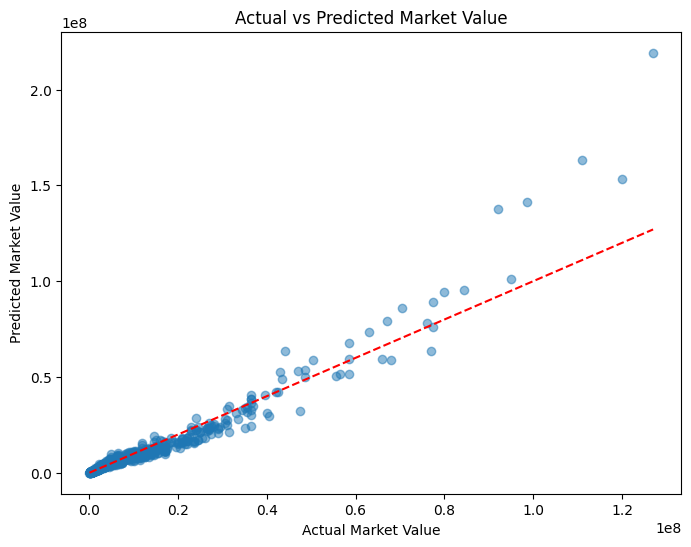

In [23]:
import matplotlib.pyplot as plt

actual_values = np.exp(y_test)
predicted_values = y_pred_original

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='dashed')  # perfect predictions line
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value")
plt.show()


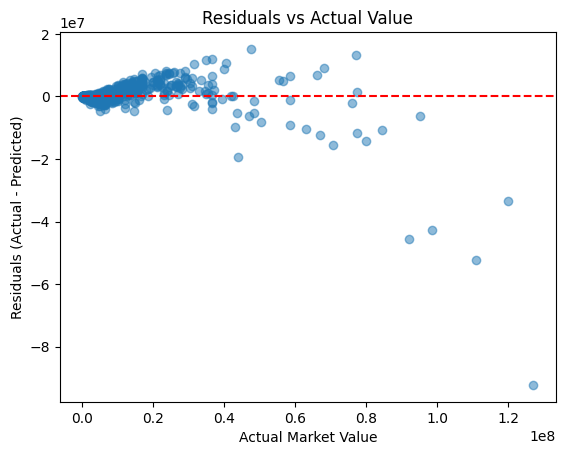

In [24]:
plt.scatter(actual_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Actual Market Value")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Actual Value")
plt.show()


In [43]:
df.head(5)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0
3,16,64,62,82,1,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,1,0,14.150029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,66.8,56.8,31.4,8.2,0.0,1.0,0.0,0.0
4,33,89,89,89,1,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,0.924051,95,84,55,94,83.0,0.975309,86,93.0,83,93,92,0.677686,66,70,53.0,66,75,0.107728,15,13,5.0,10,13,0.955182,88,94.0,83.0,88.0,0.871383,92,90,2292,5,0,16.651179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,79.2,89.8,66.0,11.2,0.0,0.0,0.0,1.0
